In [42]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [43]:

# -----------------------
# GPU CHECK
# -----------------------
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
    raise SystemError(f'GPU device not found! Found: {device}')
else:
    print(f'✅ Found GPU at: {device}')

# Extra: Try showing nvidia-smi info if available
try:
    import subprocess
    out = subprocess.run(['nvidia-smi','-L'], capture_output=True, text=True)
    print("\nGPU Info from nvidia-smi:")
    print(out.stdout.strip())
except Exception as e:
    print("nvidia-smi not available:", str(e))


✅ Found GPU at: /device:GPU:0

GPU Info from nvidia-smi:
GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-07f0a8e5-80e4-0a42-dec8-da8c8d35d8d7)


In [44]:
# image directory without augmentation
img_dir = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images"
# total classifiers
classifiers_list = os.listdir(img_dir)
# Rice Disease Classifiers
# note always define classifiers list index as the order the model has been trained, else due to index mismatch the outcome will be different
#rice_classifiers = classifiers_list
rice_classifiers = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
print(f'Total Rice classes {len(rice_classifiers)}, Rice disease categories in the dataset\n{rice_classifiers}')

Total Rice classes 4, Rice disease categories in the dataset
['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


In [45]:
id_list = [i for i in range(len(rice_classifiers))]

# labels distionary
rice_dict =  dict(zip(rice_classifiers, id_list))

print(f'Rice classifiers dictionary\n{rice_dict}')

Rice classifiers dictionary
{'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}


In [46]:
def convert_img_to_array(image_path):
  try:
    img = plt.imread(image_path)
    if img is not None:
      return img_to_array(img)
    else:
      return np.array([])
  
  except Exception as e:
    print(f'Error {e}')
    return None

In [47]:
def fetch_img(img_dir):

  rice_classifiers_path = [os.path.join(img_dir, disease) for disease in rice_classifiers]
  print(f'Rice directory names list {rice_classifiers_path}')
  # image array list
  image_list = []
  # image labels list
  label_list = []
  # label_dataframe
  label_df = pd.DataFrame(columns=rice_classifiers)
  # image dataframe
  img_df = pd.DataFrame(columns=['Image', 'Shape', 'Label'])

  try:
    print('\n[INFO] Loading images ...')
    # total sample count
    sample_count = 0
    for sr, rice_disease_path in enumerate(rice_classifiers_path):
      print(f'[INFO] Processing {rice_classifiers[sr]}')
      sample_list = os.listdir(rice_disease_path)
      #print(len(sample_list))
      for disease_sample in sample_list:
        # removing the .DS_store files from list, which contains the folder infos
        if disease_sample == '.DS_store':
          sample_list.remove(disease_sample)
      # categorical count
      count = 0
      for disease_sample in sample_list:
        disease_sample_path = os.path.join(rice_disease_path, disease_sample)
        if disease_sample_path.endswith(".jpg") == True or disease_sample_path.endswith(".JPG") == True:
          img = convert_img_to_array(disease_sample_path)
          #image_list.append(img)
          #label_list.append(rice_classifiers[sr])
          img_df.loc[sample_count,'Image'], img_df.loc[sample_count,'Label'] = disease_sample_path, rice_classifiers[sr]
          img_df.loc[sample_count,'Shape'] = img.shape
          count += 1
          sample_count += 1
      label_df.loc[0, rice_classifiers[sr]] = count

    return image_list, label_list, label_df, img_df   
      
  except Exception as e:
    print(f'Error {e}')
    return None

In [48]:
# main image directory
img_dir = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images"

print(f'Image directory with augmentation {img_dir}\n')

# fetching image array list, label_list, label_array, image_array
image_list, label_list, label_df, img_df = fetch_img(img_dir)


#if len(image_list_augmented) == len(label_list_augmented):
#  print('\nCheck Successful for augmented datasets')
#  print(f'Total Rice Image samples in augmented datasets {len(image_list_augmented)}\n')
#  print(f'Label dataframe augmented\n')

#else:
#  print('Verify Dataloader or work on labelling')

print(f'\nCategory-wise counts in the dataset\n{label_df}')
print('\nImage dataframe\n')
img_df

Image directory with augmentation C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images

Rice directory names list ['C:\\Users\\ruchi\\OneDrive\\Desktop\\Rice2\\Rice Leaf Disease Images\\Bacterialblight', 'C:\\Users\\ruchi\\OneDrive\\Desktop\\Rice2\\Rice Leaf Disease Images\\Blast', 'C:\\Users\\ruchi\\OneDrive\\Desktop\\Rice2\\Rice Leaf Disease Images\\Brownspot', 'C:\\Users\\ruchi\\OneDrive\\Desktop\\Rice2\\Rice Leaf Disease Images\\Tungro']

[INFO] Loading images ...
[INFO] Processing Bacterialblight
[INFO] Processing Blast
[INFO] Processing Brownspot
[INFO] Processing Tungro

Category-wise counts in the dataset
  Bacterialblight Blast Brownspot Tungro
0            1584  1440      1600   1308

Image dataframe



,Image,Shape,Label
0,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(300, 300, 3)",Bacterialblight
1,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(300, 300, 3)",Bacterialblight
2,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(300, 300, 3)",Bacterialblight
3,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(300, 300, 3)",Bacterialblight
4,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(300, 300, 3)",Bacterialblight
...,...,...,...
5927,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(498, 333, 3)",Tungro
5928,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(386, 257, 3)",Tungro
5929,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(537, 359, 3)",Tungro
5930,C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Lea...,"(538, 358, 3)",Tungro


In [49]:
print(f'Null check\n{img_df.isna().sum()}')

Null check
Image    0
Shape    0
Label    0
dtype: int64


In [50]:
def distribution(counts_series_augmented, title='Target Distribution'):
    fig = plt.figure(figsize=(30, 7))
    # Convert index to string if it's a tuple (like image shapes)
    x_labels = [str(label) for label in counts_series_augmented.index]
    sns.barplot(x=x_labels, y=counts_series_augmented.values)
    plt.title(title, fontsize=14)
    plt.xlabel("Categories")
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [51]:
# returns pandas series with classes as keys and count as values for augmented dataset
target_counts = img_df['Label'].value_counts()

# shape analysis for augmented
shape_counts = img_df['Shape'].value_counts()

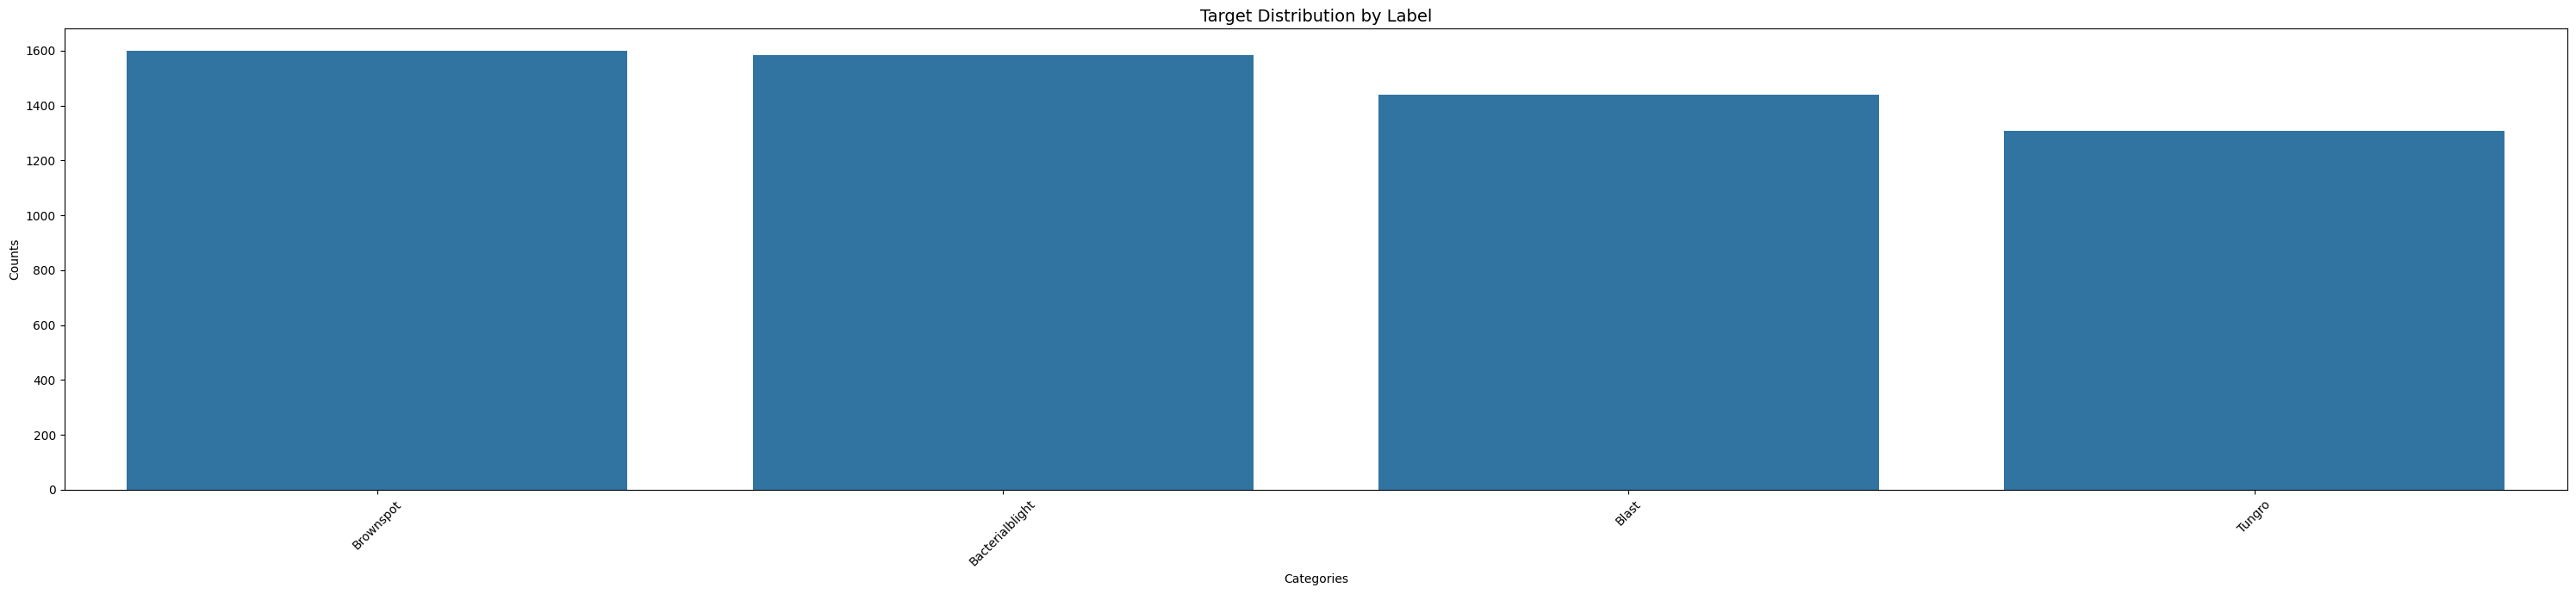

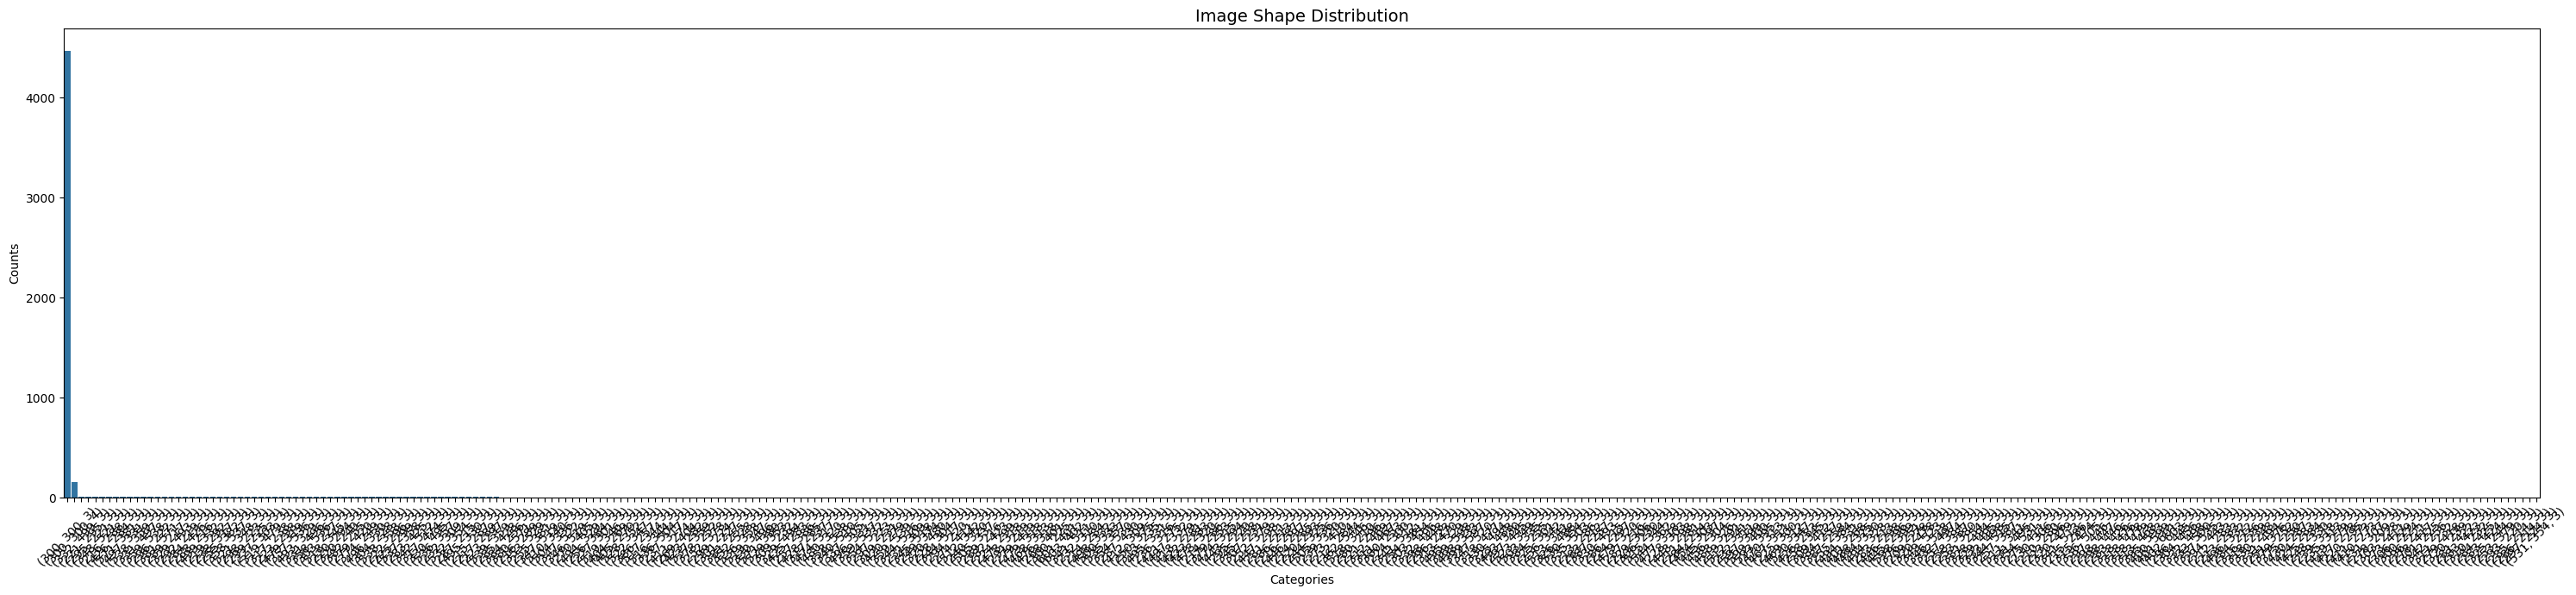

In [52]:
distribution(target_counts, title='Target Distribution by Label')
distribution(shape_counts, title='Image Shape Distribution')

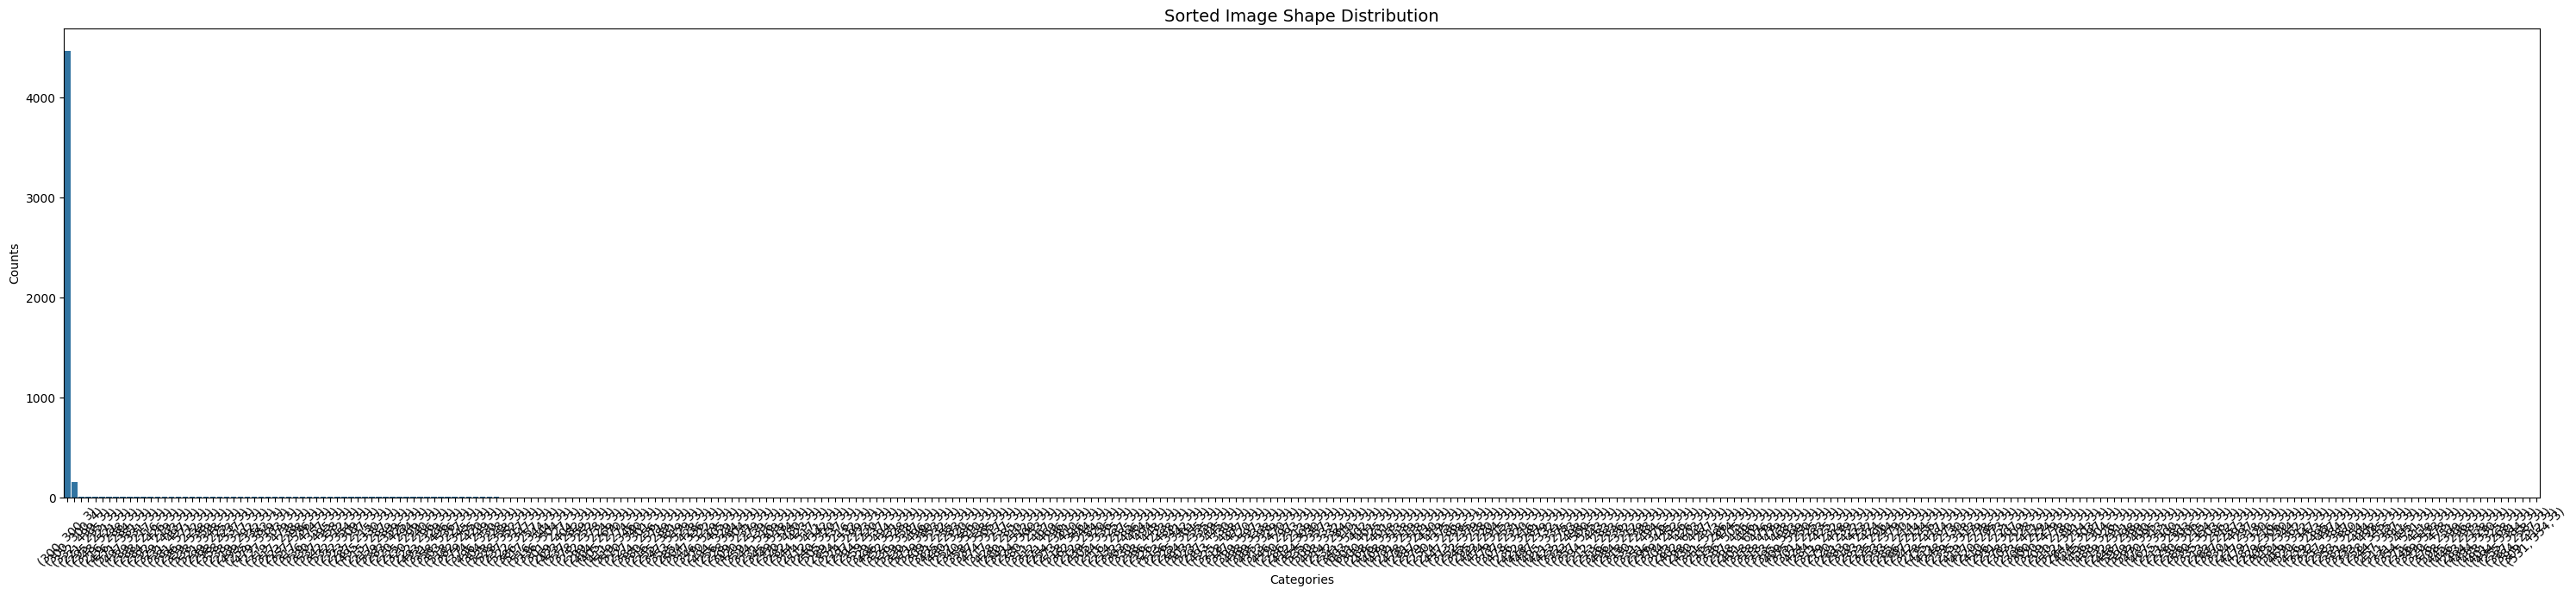

In [53]:
shape_counts_sorted = shape_counts.sort_values(ascending=False)
distribution(shape_counts_sorted, title='Sorted Image Shape Distribution')


Image shape comparison between different categories 

Shape          Label          
(300, 300, 3)  Brownspot          1552
               Bacterialblight    1476
               Blast              1440
(300, 300, 4)  Bacterialblight     108
               Brownspot            48
                                  ... 
(325, 244, 3)  Tungro                2
(328, 494, 3)  Tungro                2
(329, 495, 3)  Tungro                2
(330, 248, 3)  Tungro                2
(330, 493, 3)  Tungro                2
Name: count, Length: 361, dtype: int64



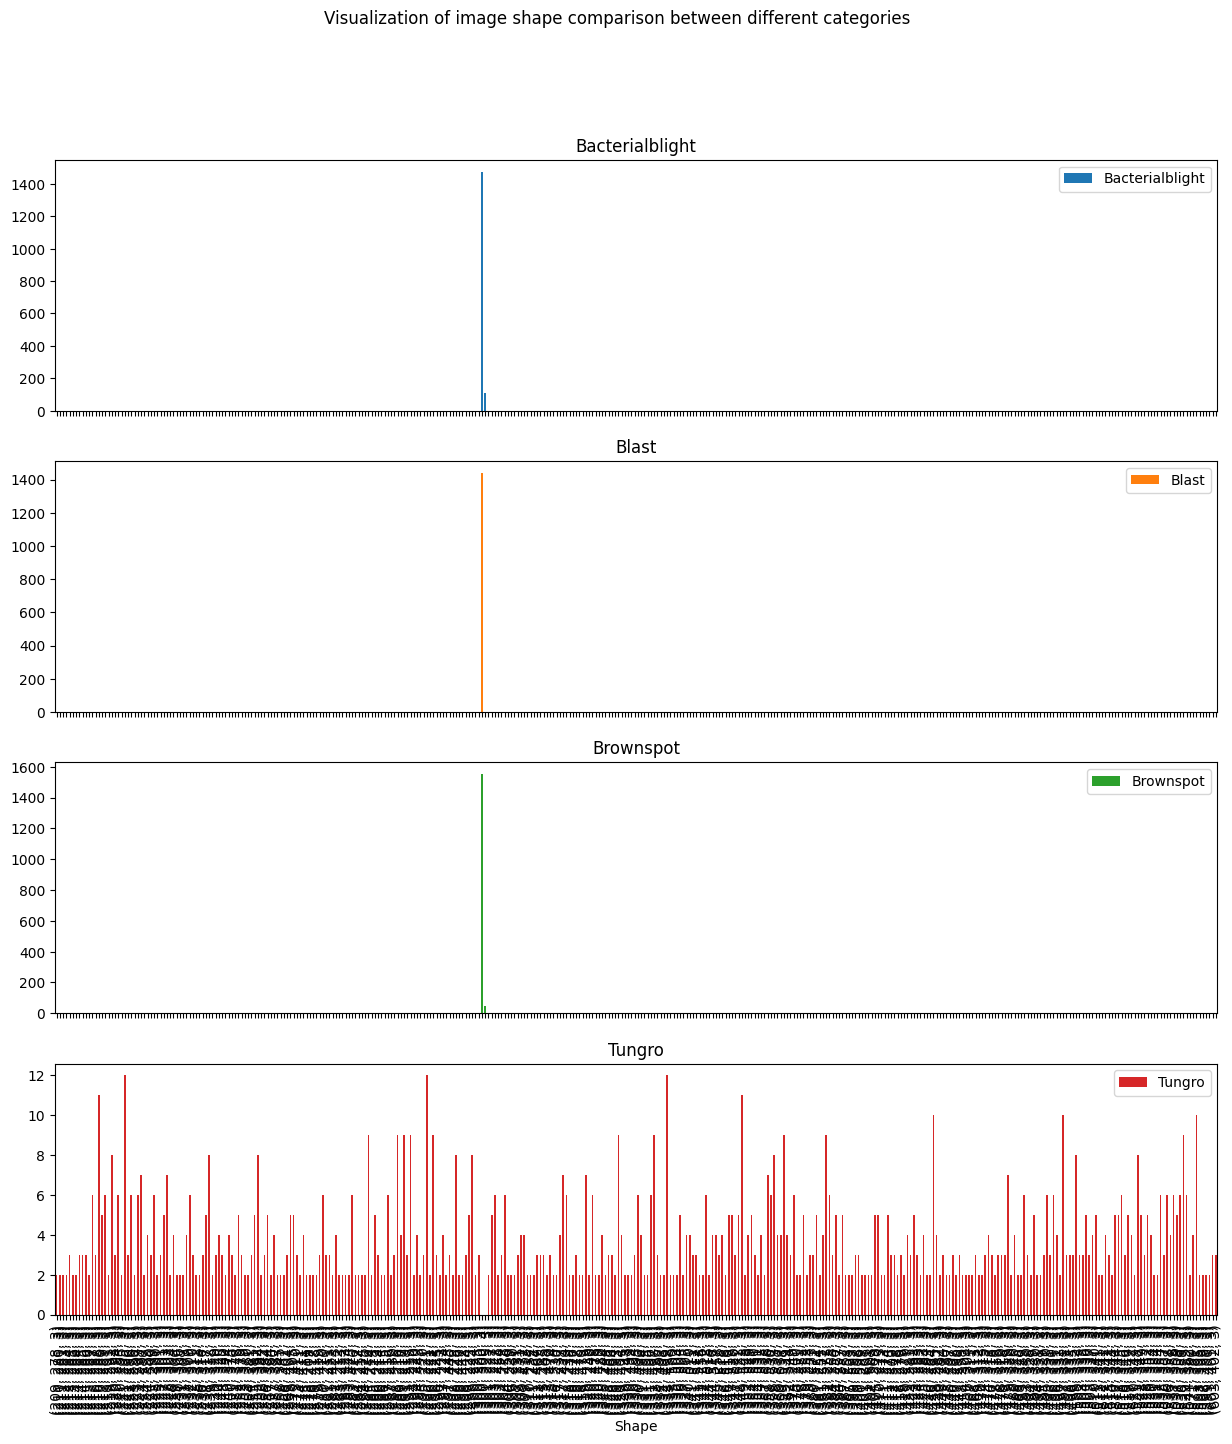

In [54]:
level_shape_df = img_df[['Shape', 'Label']].value_counts()
print(f'Image shape comparison between different categories \n\n{level_shape_df}\n')

# plotting the multi-index dataframe's hist() plot, where label, and shape are two index
level_shape_df.unstack(level = 1).plot(kind = 'bar', subplots = True, figsize = (15,15), 
                                       title = 'Visualization of image shape comparison between different categories')
plt.show()

In [55]:
import tensorflow as tf

def img_rescale(img_path):
    # Load image file
    img_raw = tf.io.read_file(img_path)

    # Decode image with 3 channels (RGB); handles RGBA internally
    img = tf.image.decode_image(img_raw, channels=3, expand_animations=False)

    # Convert to float32 and normalize to [0, 1]
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    return img


In [56]:
# list of images having alpha channel
sample_img_path = [img_df['Image'][a] for a,i in enumerate(img_df['Shape']) if i[2]==4][0]
print(f'Sample image shape(verify) having the alpha channel- {plt.imread(sample_img_path).shape} \n {sample_img_path}')

Sample image shape(verify) having the alpha channel- (300, 300, 4) 
 C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images\Bacterialblight\BACTERAILBLIGHT3_076.jpg


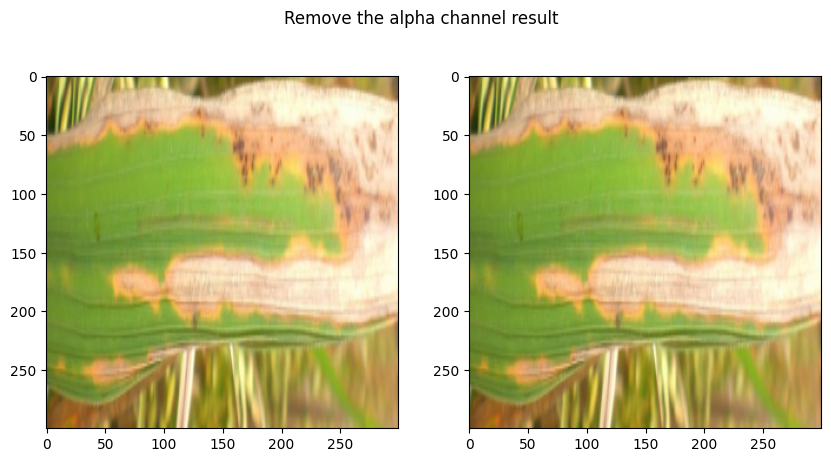

Image dtype before, after removal float32, <dtype: 'float32'>
Image shape before, after removal (300, 300, 4), (300, 300, 3)


In [57]:
# take sample image of category 1
#sample_img_path = '/content/drive/MyDrive/Geometric image classification/Geometric Image Classification/Image_2/Input/Dataset/train/category 1/category 1_original_1000.png_01b3b4fc-dabe-457d-9159-3c2e7eb77785.png'

fig = plt.figure(figsize=(10,5))
fig.suptitle('Remove the alpha channel result')

# original image
img = plt.imread(sample_img_path)
fig.add_subplot(121)
plt.imshow(img)

# after removing alpha channel
img_rgb = img_rescale(sample_img_path)
fig.add_subplot(122)
plt.imshow(img_rgb)

plt.show()

print(f'Image dtype before, after removal {img.dtype}, {img_rgb.dtype}')
print(f'Image shape before, after removal {img.shape}, {img_rgb.shape}')

In [58]:
# validation split
val_ratio = 0.10
# test split
test_ratio = 0.5

# image_ids
img_ids = img_df.loc[:,'Image']

# image_ids
label_ids = img_df.loc[:,'Label']

In [59]:
# train df
train_df = pd.DataFrame(columns=['Image','Label'])
# validation main df
valid_main_df = pd.DataFrame(columns=['Image','Label'])
# validation df
valid_df = pd.DataFrame(columns=['Image','Label'])
# test df
test_df = pd.DataFrame(columns=['Image','Label'])

In [60]:
# without shuffling startification is not possible
train_df['Image'], valid_main_df['Image'], train_df['Label'], valid_main_df['Label'] = train_test_split(img_ids, label_ids,
                                                                                                        test_size = val_ratio,
                                                                                                        random_state = 28,
                                                                                                        stratify = label_ids,
                                                                                                        shuffle = True
                                                                                                        )

print(f'Train dataframe shape {train_df.shape}')
print(f'Validation dataframe shape {valid_main_df.shape}')

Train dataframe shape (5338, 2)
Validation dataframe shape (594, 2)


In [61]:
# without shuffling startification is not possible
valid_df['Image'], test_df['Image'], valid_df['Label'], test_df['Label'] = train_test_split(valid_main_df.loc[:,'Image'], valid_main_df.loc[:,'Label'],
                                                                                                        test_size = test_ratio,
                                                                                                        random_state = 28,
                                                                                                        stratify = valid_main_df.loc[:,'Label'],
                                                                                                        shuffle = True
                                                                                                        )

print(f'Train dataframe shape {train_df.shape}')
print(f'Train dataframe shape {valid_df.shape}')
print(f'Validation dataframe shape {test_df.shape}')

Train dataframe shape (5338, 2)
Train dataframe shape (297, 2)
Validation dataframe shape (297, 2)


In [62]:
# startified vis func
def distribution_vis_check(train, valid):
  '''
  Target distribution
  '''
  xdf = [train.index, valid.index]
  ydf = [train.values, valid.values]
  label = ['Train Distribution', 'Validation Distribution']
  fig = plt.figure(figsize=(20,5))
  for i in range(len(xdf)):
    fig.add_subplot(1, len(xdf), i+1)
    sns.barplot(x = xdf[i], y = ydf[i])
    plt.xlabel(label[i], fontsize = 16)

In [63]:
print('Startification result-')
print('Train set -\n{}'.format(train_df['Label'].value_counts()))
print('Validation set -\n{}'.format(valid_df['Label'].value_counts()))

Startification result-
Train set -
Label
Brownspot          1440
Bacterialblight    1425
Blast              1296
Tungro             1177
Name: count, dtype: int64
Validation set -
Label
Bacterialblight    80
Brownspot          80
Blast              72
Tungro             65
Name: count, dtype: int64


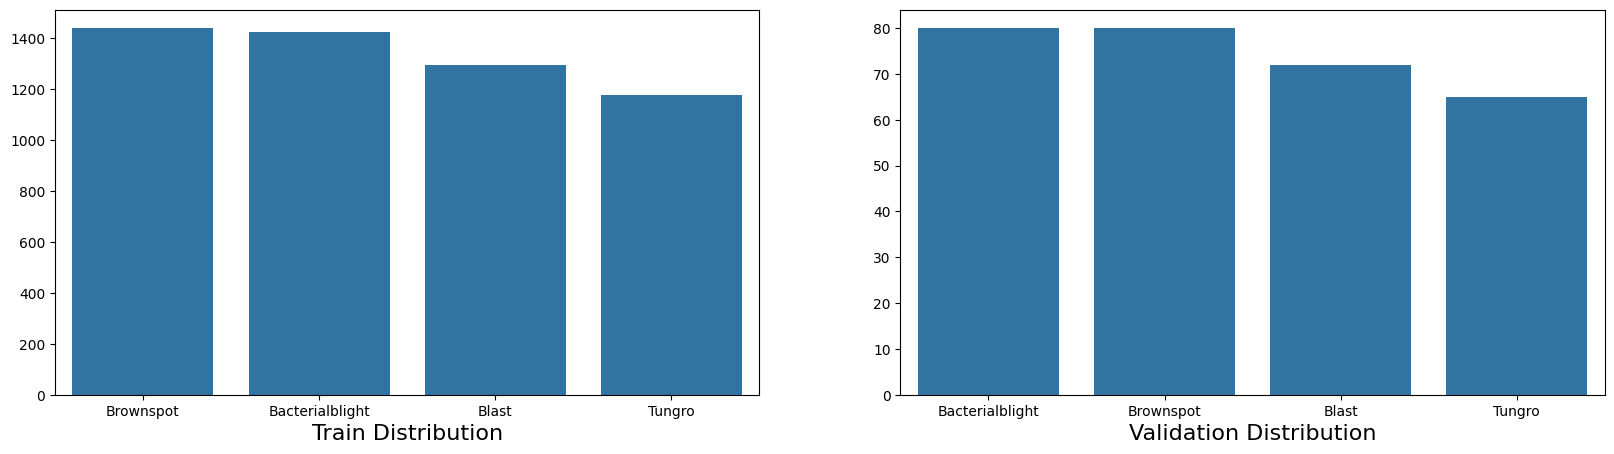

In [64]:
distribution_vis_check(train_df['Label'].value_counts(), valid_df['Label'].value_counts())

In [65]:
def pre_process(img):
    # Check if image has 4 channels (RGBA)
    if tf.shape(img)[-1] == 4:
        # Convert RGBA to RGB by removing the alpha channel
        img = img[..., :3]

    # Convert image to float32 for normalization
    img = tf.cast(img, tf.float32)

    # Normalize image to range [0, 1]
    min_val = tf.reduce_min(img)
    max_val = tf.reduce_max(img)
    img = (img - min_val) / (max_val - min_val + 1e-5)  # Add epsilon to avoid division by zero

    return img


In [66]:
# define batch size based on which datagen will prepare the data
batch_size = 16

# to use sparse categorical cross entropy 
class_mode = 'sparse'

# target size to standard (256,256)
target_size = (256,256)

# bicubic interpolation used 
interpolation = 'bicubic'

# define columns
columns = ['Image', 'Label']

In [67]:
# creating imagedatagenerator object using keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=None,
                                   width_shift_range = None,
                                   height_shift_range = None,
                                   brightness_range = None,
                                   zoom_range = 0.0,
                                   rescale = None,
                                   preprocessing_function = pre_process,
                                   )

# provide same seed and keyword arguments to the fit and flow methods 
seed = 1

# obtaining images from augmented train dataset and apply augmentation using datagen to create batches
train_generator = datagen.flow_from_dataframe(dataframe = train_df,
                                              directory = img_dir,
                                              x_col = columns[0],
                                              y_col = columns[1],
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode = class_mode,
                                              target_size = target_size, 
                                              classes = rice_classifiers,
                                              interpolation = interpolation
                              )

# obtaining images from validation dataset and apply augmentation using datagen to create batches
valid_generator = datagen.flow_from_dataframe(dataframe = valid_df,
                                              directory = img_dir,
                                              x_col = columns[0],
                                              y_col = columns[1],
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode = class_mode,
                                              target_size = target_size, 
                                              classes = rice_classifiers,
                                              interpolation = interpolation
                              )

# obtaining images from validation dataset and apply augmentation using datagen to create batches
test_generator = datagen.flow_from_dataframe(dataframe = test_df,
                                              directory = img_dir,
                                              x_col = columns[0],
                                              y_col = columns[1],
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode = class_mode,
                                              target_size = target_size, 
                                              classes = rice_classifiers,
                                              interpolation = interpolation
                              )

Found 5338 validated image filenames belonging to 4 classes.
Found 297 validated image filenames belonging to 4 classes.
Found 297 validated image filenames belonging to 4 classes.


In [68]:
assert train_generator.class_indices == valid_generator.class_indices == test_generator.class_indices == rice_dict
assert train_generator.image_shape == valid_generator.image_shape == test_generator.image_shape == (256,256,3)
assert train_generator.dtype == valid_generator.dtype == test_generator.dtype == 'float32'

print('Assertion check passed for data generation!')

Assertion check passed for data generation!


In [69]:
len(train_generator)

334

In [70]:
def img_label_samples(train_generator, class_count = 4):
  '''
  Fetches 1st sample of each class from 0 to 4
  Along with the class label or id
  Takes total class samples to be visualized 
  Batch count as attributes
  '''
  # total batches in the train datagenerator
  batch_count = len(train_generator)
  # image list initialization
  img_list = []
  # labels list
  labels = []

  for cls in range(class_count):
    for batch in range(batch_count):
      # traversing through image label or class id
      # O-> Batch, 1-> Class(for 1, 0 for image), 2-> Index of each image in the batch(0 to 31)
      for i, j in enumerate(train_generator[batch][1][:]):
        if int(j)==cls:
          img_list.append(train_generator[batch][0][i])
          labels.append(int(j))
          break
      if int(j) == cls:
        break
  return img_list, labels

In [71]:
# obtain image and label list from train_generator
img_list, labels = img_label_samples(train_generator)
print(f'Image data max {img_list[0].max()}, min {img_list[1].min()}')

Image data max 0.9999999403953552, min 0.0


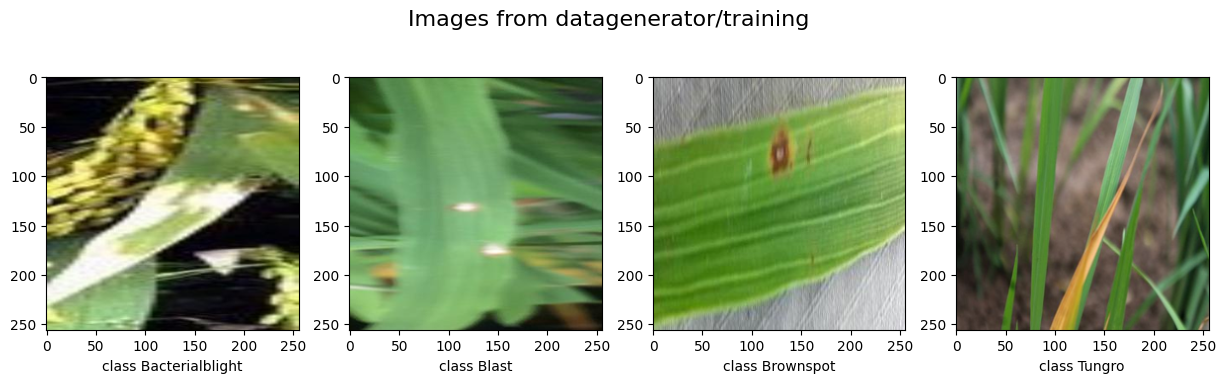

In [121]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Images from datagenerator/training', fontsize = 16)
fig.tight_layout()

for i, (img, label) in enumerate(zip(img_list, labels)):
  fig.add_subplot(1,len(img_list), i+1)
  plt.imshow(img)
  plt.xlabel(f'class {rice_classifiers[label]}')

plt.show()

In [73]:
# input image shape = (256,256,3)
input_shape = (256,256,3)
# num_classes = 3
num_classes = len(rice_classifiers)
print(f'Model input_shape {input_shape}')
print(f'Number of output class {num_classes}')

Model input_shape (256, 256, 3)
Number of output class 4


In [74]:
import keras
from keras.utils.vis_utils import plot_model
def model(input_shape, num_classes):
  inputs = keras.layers.Input(shape = input_shape)

  x = keras.layers.Conv2D(filters = 16, kernel_size=3, activation='relu', strides=1)(inputs)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', strides=1)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', strides=1)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', strides=1)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  x = keras.layers.Dropout(rate = 0.3)(x)
  output = keras.layers.Dense(num_classes, activation='softmax')(x)

  return keras.models.Model(inputs = inputs, outputs = output)

model = model(input_shape, num_classes)
model.summary()
# save model structure image
plot_model(model, to_file = 'Corn_model_cnn.png')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128   

In [75]:
# optimal LR
learning_rate = 0.001 # initial LR here is 1e-8
epochs = 30
batch_size = 16
loss_fn = 'sparse_categorical_crossentropy'

In [76]:
from tensorflow.keras.optimizers import Adam
keras.backend.clear_session()

# defining the optimizer 
optimizer = Adam(learning_rate)
#optimizer = Adam(lr = learning_rate)
model.compile(optimizer=optimizer, loss = loss_fn, metrics = ['acc'])

In [77]:
# use only once after 1st compiling
model.save_weights('model_initial.h5')

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint

# # creating model directory to save model details
# if not os.path.isdir('Model'):
#   os.mkdir('Model')

# # model checkpoint augmented
# filepath_augmented = 'rice_epoch{epoch:02d}-acc {val_acc:0.4f}.hdf5'
# mc_augmented = ModelCheckpoint(filepath=filepath_augmented, monitor='val_acc', save_weights_only=True,mode = 'max', verbose = 1)

# reduce Learning Rate on Plateu
# if it observes training curve(val_acc) is stuck in plateu, reduces LR by factor 0.2 with a patience = 3 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_acc',
                                                 factor = 0.2,
                                                 patience =5
                                                 )

# initially erro is too high so starting from LR 1e-01 as the initial LR
# learning rate scheduler to obtain optimum LR
# schedule is exponential decaying LR

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-03/(epoch+1))

In [79]:
# clearing session
keras.backend.clear_session()
steps = len(valid_generator.classes)/batch_size

In [80]:
# use if when need to initialize to train from scratch
model.load_weights('model_initial.h5')
# check initialize
model.evaluate(valid_generator, steps = steps)

18/18 [==============================] - 3s 114ms/step - loss: 1.3856 - acc: 0.2391


[1.3855741024017334, 0.2390572428703308]

In [83]:
train_steps = len(train_generator.classes)/batch_size

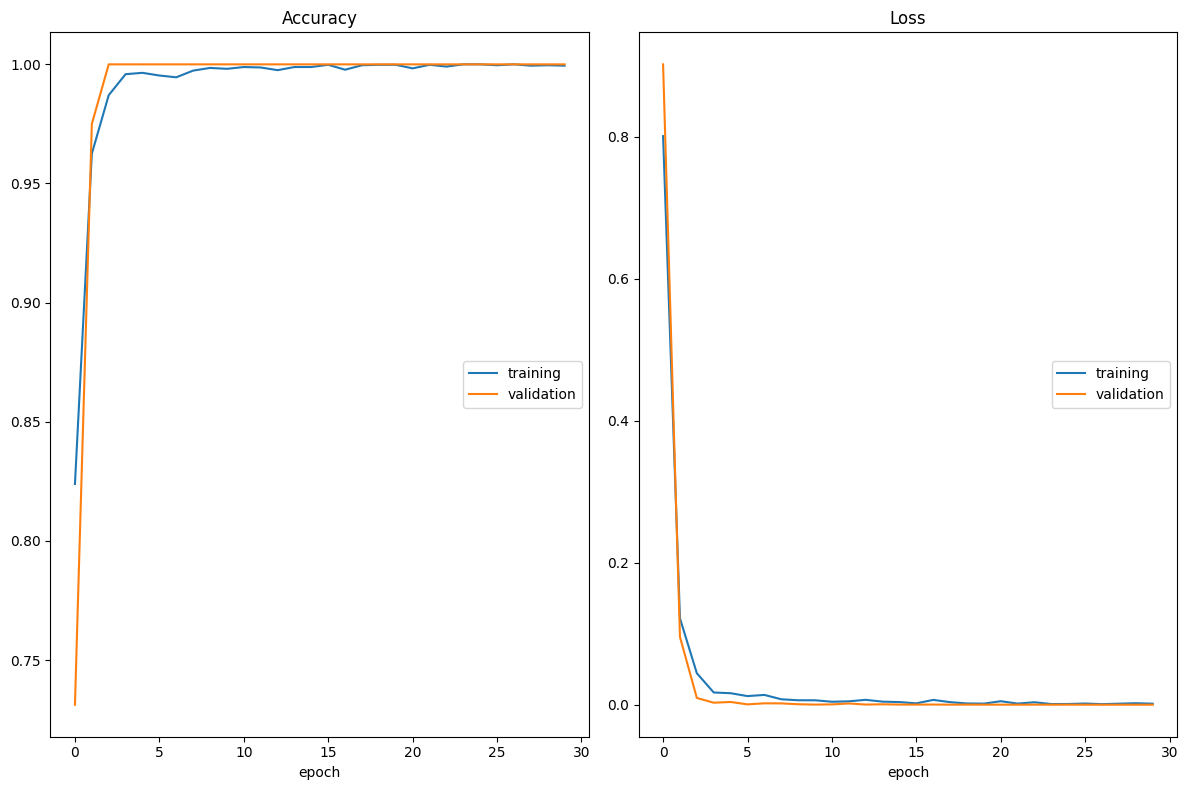

Accuracy
	training         	 (min:    0.824, max:    1.000, cur:    0.999)
	validation       	 (min:    0.731, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.001, max:    0.801, cur:    0.001)
	validation       	 (min:    0.000, max:    0.902, cur:    0.000)
333/333 [==============================] - 41s 123ms/step - loss: 0.0014 - acc: 0.9994 - val_loss: 1.3013e-05 - val_acc: 1.0000 - lr: 3.3333e-05


In [84]:
from livelossplot import PlotLossesKeras
history = model.fit(train_generator, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    validation_data=valid_generator, 
                    steps_per_epoch= train_steps, 
                    validation_steps = 10,
                    verbose = 1, 
                    callbacks = [PlotLossesKeras(),  
                                        lr_schedule,
                                         reduce_lr],)
                                         

In [85]:
model.save("RiceCNN.h5")
model.save("RiceCNN")

INFO:tensorflow:Assets written to: RiceCNN\assets


INFO:tensorflow:Assets written to: RiceCNN\assets


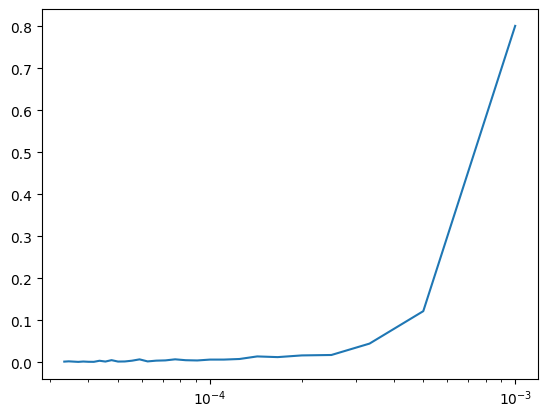

In [86]:
plt.semilogx(history.history['lr'], history.history['loss'])

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
import matplotlib.cm as cm

In [88]:
# Convert test_generator to full arrays
x_test_augmented = []
y_test_augmented = []

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    x_test_augmented.append(x_batch)
    y_test_augmented.append(y_batch)

x_test_augmented = np.concatenate(x_test_augmented)
y_test_augmented = np.concatenate(y_test_augmented)


In [89]:
loss, acc = model.evaluate(x_test_augmented, y_test_augmented)
print(f'Augmented Test Loss: {loss}, Accuracy: {acc}')

y_pred = model.predict(x_test_augmented)
y_pred = np.argmax(y_pred, axis=1)


10/10 [==============================] - 1s 27ms/step - loss: 3.8951e-04 - acc: 1.0000
Augmented Test Loss: 0.0003895053523592651, Accuracy: 1.0
10/10 [==============================] - 1s 22ms/step


In [94]:
weights_file = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\RiceCNN"
model.load_weights(weights_file)
loss, acc = model.evaluate(x_test_augmented, y_test_augmented)
print('Model evaluation trained on Augmented dataset\n')
print(f'Augmented Test Loss: {loss}, Accuracy: {acc}')

# predicted output
y_pred = model.predict(x_test_augmented)
# transforming to applicable format (m,3) to (m,)
y_pred = np.argmax(y_pred, 1)
#y_test_augmented = np.argmax(y_test_augmented, 1)

10/10 [==============================] - 0s 25ms/step - loss: 3.8951e-04 - acc: 1.0000
Model evaluation trained on Augmented dataset

Augmented Test Loss: 0.0003895053523592651, Accuracy: 1.0
10/10 [==============================] - 0s 22ms/step


In [95]:
print(f'Classification Report for augmented set based model\n{metrics.classification_report(y_test_augmented, y_pred)}')
print(f'\nClassification accuracy: {metrics.accuracy_score(y_test_augmented, y_pred)*100: 0.2f}\n')

Classification Report for augmented set based model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        79
         1.0       1.00      1.00      1.00        72
         2.0       1.00      1.00      1.00        80
         3.0       1.00      1.00      1.00        66

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297


Classification accuracy:  100.00



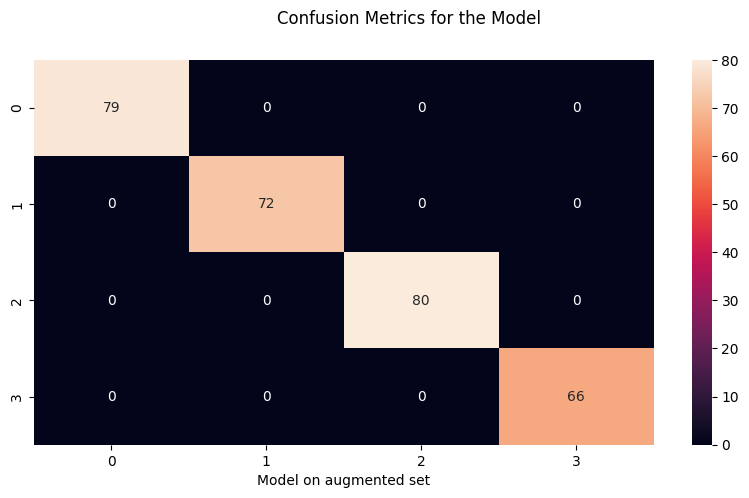

In [96]:
fig_cm = plt.figure(figsize=(10,5))
fig_cm.suptitle('Confusion Metrics for the Model')
sns.heatmap(confusion_matrix(y_test_augmented, y_pred), annot = True)
plt.xlabel('Model on augmented set')
plt.show()

In [97]:
print(f'Final model weights\n\"{weights_file}\"')

Final model weights
"C:\Users\ruchi\OneDrive\Desktop\Rice2\RiceCNN"


In [98]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_and_display_tf(image_path, model, rice_classifiers, target_size=(256, 256)):
    """
    Predicts the class of a given image using TensorFlow and displays it with the predicted label.
    
    Parameters:
    - image_path: str, path to the image file
    - model: trained TensorFlow/Keras model
    - rice_classifiers: list of class names
    - target_size: tuple, image resize dimensions
    """
    # Load and decode image
    img_raw = tf.io.read_file(image_path)
    img = tf.image.decode_image(img_raw, channels=3)
    img = tf.image.resize(img, target_size, method='bicubic')
    img = tf.cast(img, tf.float32)

    # Normalize (same as your pre_process function)
    img -= tf.reduce_min(img)
    img /= (tf.reduce_max(img) - tf.reduce_min(img))

    # Add batch dimension
    img_input = tf.expand_dims(img, axis=0)

    # Predict
    prediction = model.predict(img_input)
    predicted_class = rice_classifiers[np.argmax(prediction)]

    # Display image with prediction
    plt.figure(figsize=(5,5))
    plt.imshow(img.numpy().astype("float32"))
    plt.title(f'Predicted Class: {predicted_class}', fontsize=14)
    plt.axis('off')
    plt.show()

    print(f'Predicted class for image: {predicted_class}')


1/1 [==============================] - 0s 23ms/step


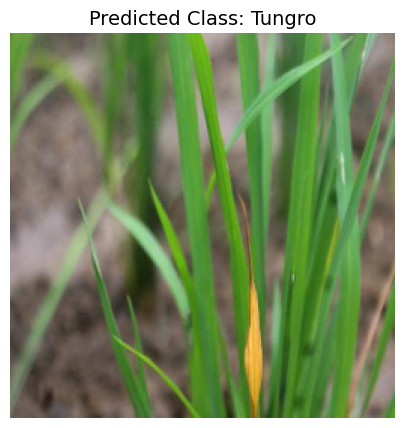

Predicted class for image: Tungro


In [104]:
image_path = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images\Tungro\TUNGRO3_217.JPG"
predict_and_display_tf(image_path, model, rice_classifiers)


1/1 [==============================] - 0s 33ms/step


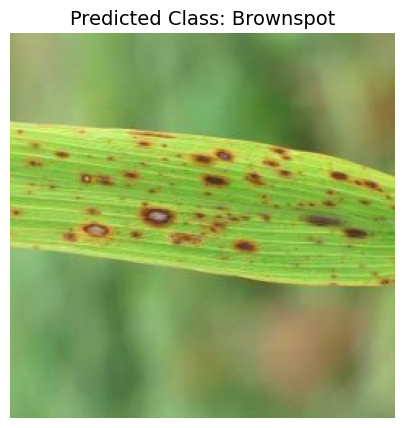

Predicted class for image: Brownspot


In [105]:
image_path = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images\Brownspot\BROWNSPOT2_096.jpg"
predict_and_display_tf(image_path,model,rice_classifiers)

1/1 [==============================] - 0s 32ms/step


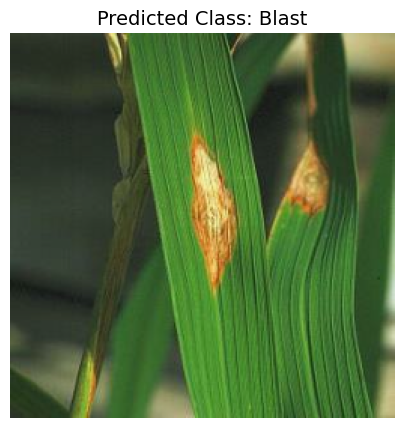

Predicted class for image: Blast


In [106]:
image_path=r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images\Blast\BLAST9_151.jpg"
predict_and_display_tf(image_path,model,rice_classifiers)

1/1 [==============================] - 0s 28ms/step


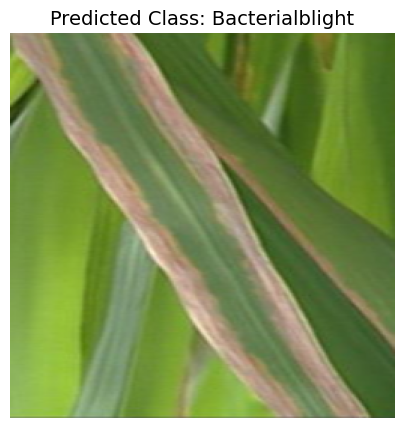

Predicted class for image: Bacterialblight


In [107]:
image_path = r"C:\Users\ruchi\OneDrive\Desktop\Rice2\Rice Leaf Disease Images\Bacterialblight\BACTERIALBLIGHT2_100.jpg"
predict_and_display_tf(image_path,model,rice_classifiers)